# 1- Basics of deep learning and neural networks

## 1.1 Introduction to deep learning : 

linear regression doesn't tackel the problem of the interactions btw features and how it inflence the prediction of y.

Neural networks are a powerful modeling approach that counts for interactions btw features really well. as a result they perform great on most prediction problems

Deep learning is the use of especially powerful Neural networks that capture complexe interactions in (audio, video, text, image, source code) 

the more a model have hidden layers, the more it captures complex interactions btw the features
hidden layers are composed from neuron/ node and each neuron represents a function that captures the interactions btw 2 features or more

## 1.2 Forward propagation : 

Forward propagation algorithm :  how neural network uses data to make prediction.

Forward propagation algorithm passes the information(features called input) through the neural network to make prediction in the output layer. 

lines connect the inputs to the hidden layers, each line has a weight indicating how strongly that input affects the hidden node where the line ends at. 
the weights that determine the features/interactions in Neural Networks are created : The model training process sets to optimize predictive accuracy.(we will learn You more about how Neural Networks optimize their weights in chapter2 )


to make predictions for each node in the hidden layer, we take the value of the node in the input layer and multiply it by the weight that ends at that node(hidden layer) and then sum all the values. and then we repeat this process for the output. 

the weights of lines are the parameters we train or change when fit a neural network to data. so those weights will be our main focus. 


ALGEBRA : DOT PRODUT ??? the process of multipy and add 



In [27]:
from IPython.display import Image
Image(filename='neural_net.png') 


# or 

# %pylab inline
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# img=mpimg.imread('neural_net.png')
# imgplot = plt.imshow(img)
# plt.show()

In [2]:
# the neural network code : 

import numpy as np 

# our input data
input_data = np.array([2,3])

#the weights of the lines at each node
weights = {'node_0': np.array([1,1]),
          'node_1': np.array([- 1,1]),
          'output': np.array([2, - 1])}

# calculating the value of the nodes that form the hidden layer
node_0_value = (input_data*weights['node_0']).sum()

node_1_value = (input_data*weights['node_1']).sum()

# hiden layers node values 
hidden_layer_values = np.array([node_0_value,node_1_value])

#output value prediction :

output = (hidden_layer_values*weights['output']).sum()
print(output)

9


## 1.2 Activation function : (applied only to the hidden layer nodes)

after the forward propagation algorithm, and for neural network to acheive their maximun predictive power, we must apply something called activation function in the hidden layers to capture non-linearities. 

**Aclivation function ** : allows the model to capture non-linearities if features the relashionship in not linear. Non- linearities captures the pattern change in features for example if the the output_1 is big number how will if affect the ouput diffrently that if it is a small number .

Aclivation function is applied to the value coming to the hiddden layer nodes. wich transforms it to the value stored in that node. 

Aclivation functions:

- identity function : used above(we dont perform any function after the multiply addition process).
- s shaped function called tanh : Compute hyperbolic tangent element-wise(give a value close to 0).
- Relu (Rectified Linear function) :The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive. examples: relu(3) = 3 and relu(-3) = 0 

the node value will be 

node_0_value = np.tanh((input_data*weights['node_0']).sum())

In [3]:
## Adding activation function to the hidden layer: tanh

# our input data
input_data = np.array([2,3])

#the weights of the lines at each node
weights = {'node_0': np.array([1,1]),
          'node_1': np.array([- 1,1]),
          'output': np.array([2, - 1])}

# calculating the value of the nodes that form the hidden layer
node_0_value = np.tanh((input_data*weights['node_0']).sum())

node_1_value = np.tanh((input_data*weights['node_1']).sum())

# hiden layers node values 
hidden_layer_values = np.array([node_0_value,node_1_value])

#output value prediction :

output = (hidden_layer_values*weights['output']).sum()
print(output)
print('\n we can see the diffrence, the output went from 9 to 1.23')

1.2382242525694254

 we can see the diffrence, the output went from 9 to 1.23


In [4]:
## Activation function using Relu : we dont have negative data so this model doesn't capture the effets of Relu

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

print('\nWithout this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights')



9

Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights


In [5]:
## building a neural netweok function to which we feed data and it gives us prediction : 


data = np.array([[3, 5],[ 1, -1], [0, 0], [8, 4]]) # four set of data
weights = {'node_0': [2, 4], 'node_1': [ 4, -5], 'output': [2, 7]}

# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


## 1.3 Deeper Networks 

modern neural network uses multiple hidden layer : they internally build up representation of the patterns the data that are useful for making predictions, this way they find increasinly complex patterns as we go through successive hidden layers of the network. this way neural network replace the need of feature engineering or manually creating better predictive features. 

Deep learning is called also representation learning because subsequent layers build increasingly sophisticated representation of the raw data until we get to a stage where ce can make predictions. 


Multipe neural network image classifier explained:

When a neural network tries to classify an image, the first hiddden layers build up patterns or interactions that are conceptually simple. a simple interaction would look at groups of nearby pictures and find patters (ex : diagonal lines, horizontal lines, blurry areas ..), once the neural network has identified where there are patters (diagonal line and blurry areas), subsquent layers combine that information to find large patterns (like big squares), a later layer might put together the location of the squares and other geometric shapes to identidy a checkedboard pattern(ex; face, cat). the cool thing about deep learning is that the modeler doesn't need to specify those interactions, instead, when you train a model, the network gets weights that find the relevent patterns to make better predictions


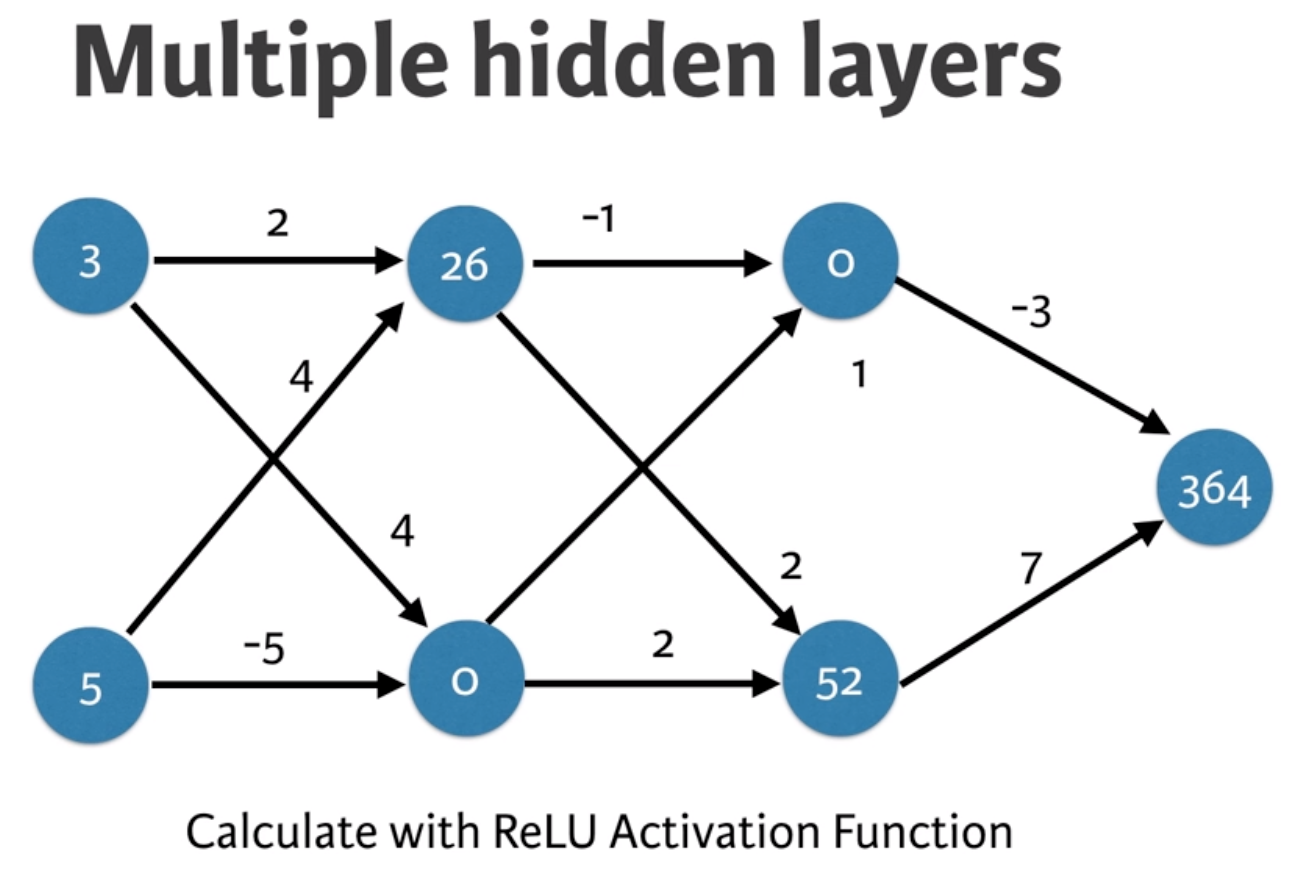

In [6]:
Image(filename='multiple_NN.png')

In [7]:
## Multi-layer neural networks : 2 hidden layers

input_data= np.array([3,5])
weights = {'node_0_0': [2, 4],
 'node_0_1': [ 4, -5],
 'node_1_0': [-1,  2],
 'node_1_1': [1, 2],
 'output': [2, 7]}

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs*weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs*weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)



182


# 2. Optimizing a neural network with backward propagation : 

you'll learn how to optimize the predictions generated by your neural networks. You'll do this using a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build from in the second half of the course

## 2.1 the need for optimazation : 

we have seen how forward propagation algorithm that neural network uses to make predictions, but the mere fact a model has a structure of neural network does guarantee the it will make good predictions. 

**the importance of model weights**  : 

Taking the first example of a neural network with one hidden layer, given a true value of the target (output) is 13, so the closer our prediction to 13 the more accurate the model is for this data points. when we used forward propagation to fill the hidden layers, the value of the output was 9. our error =13 (true value) - 9(output) = 4.

Changing any weight will change our prediction : if we change the top weight to 3 and the bottom to -2(the weights before the output). we will end up with an output 13 that is exacty the value we want to predict.


Making accurate predictions get harder with multiple points. 


**Loss function**:

at any set of weights, we have many values of the error, corresponding to the many points we make predictions for. 
We use a loss functions to aggregate the errors into a single measure of the model's predictive performance. 

Ex of a commen loss function for regression is mean square error. so to find the the mimimun to the loss function we use gradient descent. 


**optimazing model with a signle weight**: 

we need to find the weights that give us the lowest loss function 

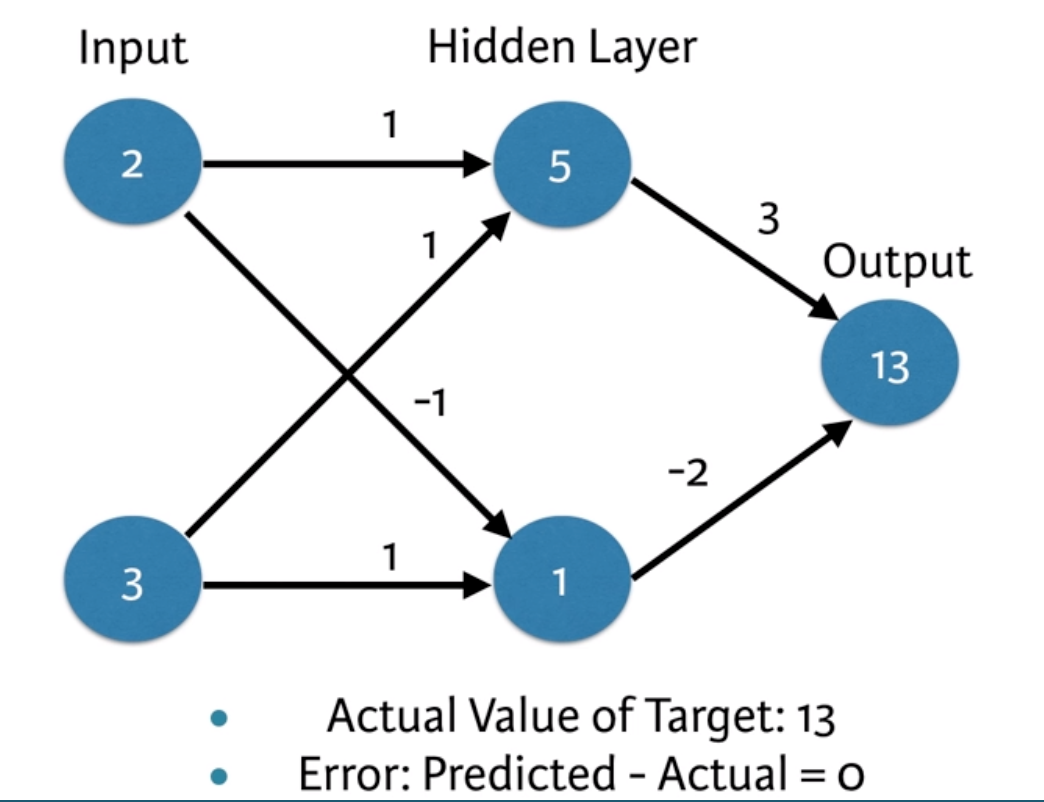

In [8]:
# Example of changing the weights to get exact true value 
Image(filename='3.png') 

In [9]:
# Example of Coding how weight changes affect accuracy on a single data points


# neural network function:
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)



# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data,weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, -2],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print("error with weights 0:", error_0)
print("error after modifying weights 1:", error_1)
print("\nNote that different weights will have different accuracies on a single prediction. ")

error with weights 0: 6
error after modifying weights 1: 0

Note that different weights will have different accuracies on a single prediction. 


In [10]:
# Scaling up to multiple data points :
# you'll want to measure model accuracy on many points. 
# You'll now write code to compare model accuracies for two different sets of weights: weights_0 and weights_1.

input_data =  np.array([[0, 3], [1, 2], [-1, -2], [4, 0]])

weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

weights_1 = {'node_0': [1, 1],
             'node_1': [1, 1.5],
             'output': [1, 1.5]
            }

target_actuals = [1, 3, 5, 7]

from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for data in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(data, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(data, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)
print('model 1 is better becaue the loss function/ MSE is smaller than model 0')

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 36.640625
model 1 is better becaue the loss function/ MSE is smaller than model 0


## 2.2 Gradient Descent : 

**Gradient Descent** : 

if the slop is positive. 
- going opposit the slop means moving to lower numbers.
- subsruct the slop from the current value. 
- learning rate around 0 and 1 : multiplying the slop with a smaller number. 

And then we update the weight with the product new value of the slop. 

**Finding the slop/gradient for each weight using the chain rule.** : 

Example : steps of calculating the slop for a given weight w0. 
||| not sur of the first 2 : When plotting the mean-squared error loss function against predictions, the slope is:
2 * x * (y-xb)
or 2 * input_data(x) * error(y-xb)

- step 1 : multiplyting the slop of the loss function (MSE) with respect to the value at the node we feed into.
- step 2 : the value of the node that feeds into our weight.
- step 3: the slop of the activation function with respect to the value we feed into. 



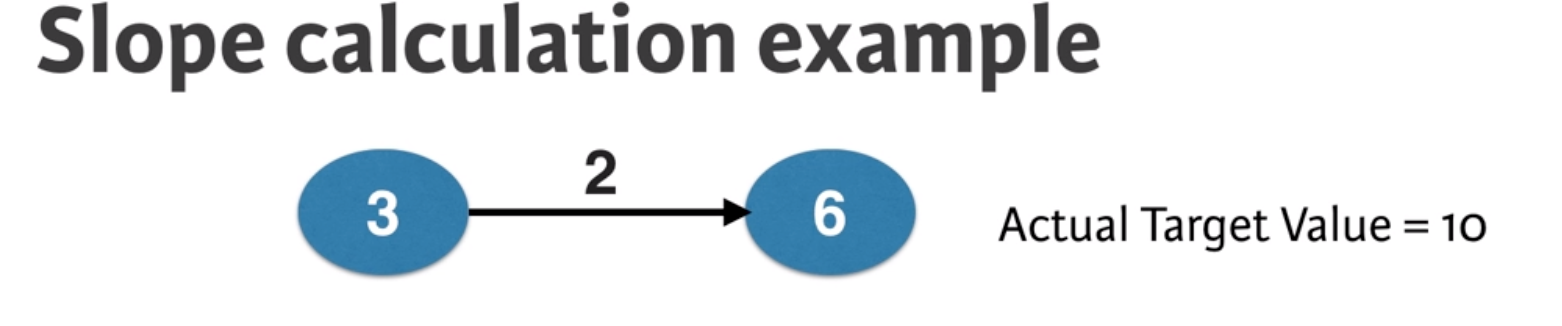

In [11]:
Image(filename='s.png')

## Samplified example to calculate the slop 2  * error(y-xb)* input_data(x)

# input = 3
# weight = 2
#predicted value = 6 
# actual value = 10
# error = -4

###################################

# slope = 2  * error(y-xb)* input_data(x)

###################################
#||step 1 :  2* error(y-xb): multiplyting the slop of the loss function (MSE) with respect to the value at the node we feed into.
# the slop of MSE loss function with respect to prediction is 2 (found with Calculus)
# so error(y-xb) = 2 * (predicted value 6 - actual 10)
# -8

#||Step 2: the value of the node that feeds into our weight.
#value of the node = 3
# -8 *3
# -24


#||||step 3: the slop of the activation function with respect to the value we feed into.
# here we don't have an activation function


# final result of the slop -24

# we would now imporove this weight by substracting the learning rate (0.01) * -24
###################################

# new weight : weight(2)- (learning_rate(0.01)*slop(-24))
#new weight = 2.24 
# the new wieght gives us a better model 

# if we continue continue repeating this process the new weight will changes until if give us a better model

# for multiple weights feeding to the output, we repeat this calculation separatley for each weight , 
#then we update both weight simultaneously using their respective derivativ. 

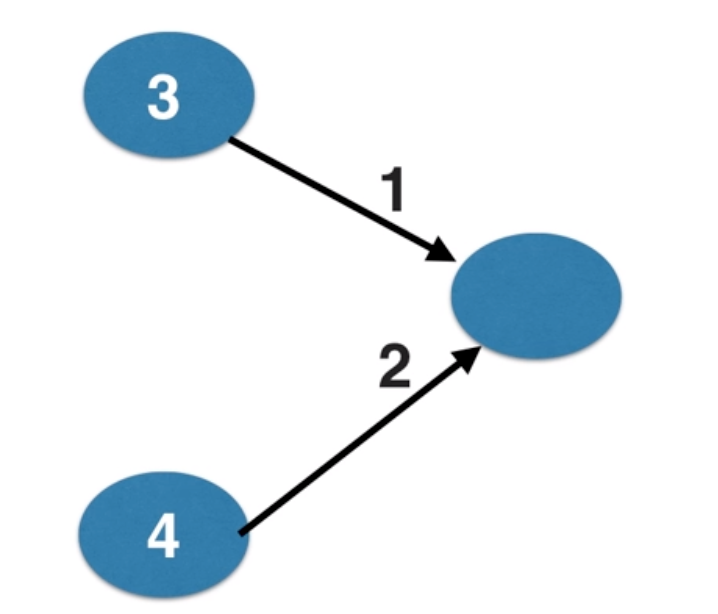

In [12]:
# Example with 2 data points and 2 weights with no activation function
# calculate the slope and update the weights: 
# the same principle applies when calclating the slop 2  * error(y-xb)* input_data(x)

Image(filename='ee.png')


In [13]:
inputs = np.array([3,4])
weights = np.array([1,2])
target = 6
learning_rate = 0.01 


predicts = (inputs*weights).sum()
error = predicts - target 
print('Error',error)

# 1 calculating the slop
#slop/ gradient : we use numpy broadcasting which multiplies and array by a number so that each entry in that array is multiplied by that number
# calculating the three steps at once
gradient = 2 * inputs * error
print('\n',gradient)
print('That give us an array that used the first node value(3), for the first calculated slop, and the second node value(4), for the second calculated slop. Incidentally, the mathematical term of this array of slops is a -gradient-, and this is where the name gradien descent comes from  ')


#  2- weights updated 
weights_updated = weights- learning_rate*gradient

# 3-  prediction with new weights 
predicts_update = (inputs*weights_updated).sum()
print('\nPredicted value',predicts_update)

# 4- error update 
error_update = predicts_update - target
print('\nError updated',error_update)

print('\nRepeating this process for the new updated values would give further improvements')



Error 5

 [30 40]
That give us an array that used the first node value(3), for the first calculated slop, and the second node value(4), for the second calculated slop. Incidentally, the mathematical term of this array of slops is a -gradient-, and this is where the name gradien descent comes from  

Predicted value 8.5

Error updated 2.5

Repeating this process for the new updated values would give further improvements


[25.401600000000002, 13.16818944, 6.826389405696002, 3.538800267912807, 1.834514058885999, 0.9510120881265021, 0.4930046664847785, 0.2555736191057092, 0.13248936414439966, 0.06868248637245665, 0.035605000935481655, 0.018457632484953686, 0.009568436680199997, 0.004960277575015649, 0.0025714078948881436, 0.0013330178527099956, 0.0006910364548448491, 0.0003582332981915815, 0.0001857081417825098, 9.627110070005501e-05]


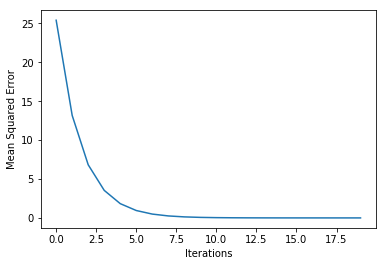

the mean squared error decreases as the number of iterations go up


In [26]:
## Making multiple updates to weights : repeating the optimaztion until we get minimal error function


# to dramatically improve the model weights, and see how the predictions improve with each update.
# This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. 


input_d = np.array([1,2,3])
wghts =  np.array([0,2,1])
tgt = 0


################
def get_slope(inputs, target, weights):
    slope = 2* inputs * ((inputs * weights).sum() - target) 
    return slope
     


def get_mse(inputs, target, weights):
    pred = (inputs*weights).sum()
    mse = mean_squared_error(np.array([target]), np.array([pred]))
    return mse


################

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    ### this function needs to update the new weights
    slope = get_slope(input_d, tgt, wghts)
    
    # Update the weights: weights 
    # udpate the wghts each time with the new values
    wghts = wghts - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_d, tgt, wghts)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

print(mse_hist)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

print('the mean squared error decreases as the number of iterations go up')

## 2.3 Backpropagation:

we have used gradient descent to optimize weight in a simple model, now we well be adding a technique called **back propagation** to calculate the slopes we need to optimize more complex deep learning models. 

**the forward propagation**: sends input data through the hidden layers and into the output layer
**back propagation** : takes the error from the output layer and propagates it backward through hidden layers toward the input layer, it calculates the necessary slopes suquentially from the weights closest to the prediction, through the hidden layers, eventually back to the weights coming from the inputs. Then we use these slopes to update our weights. 


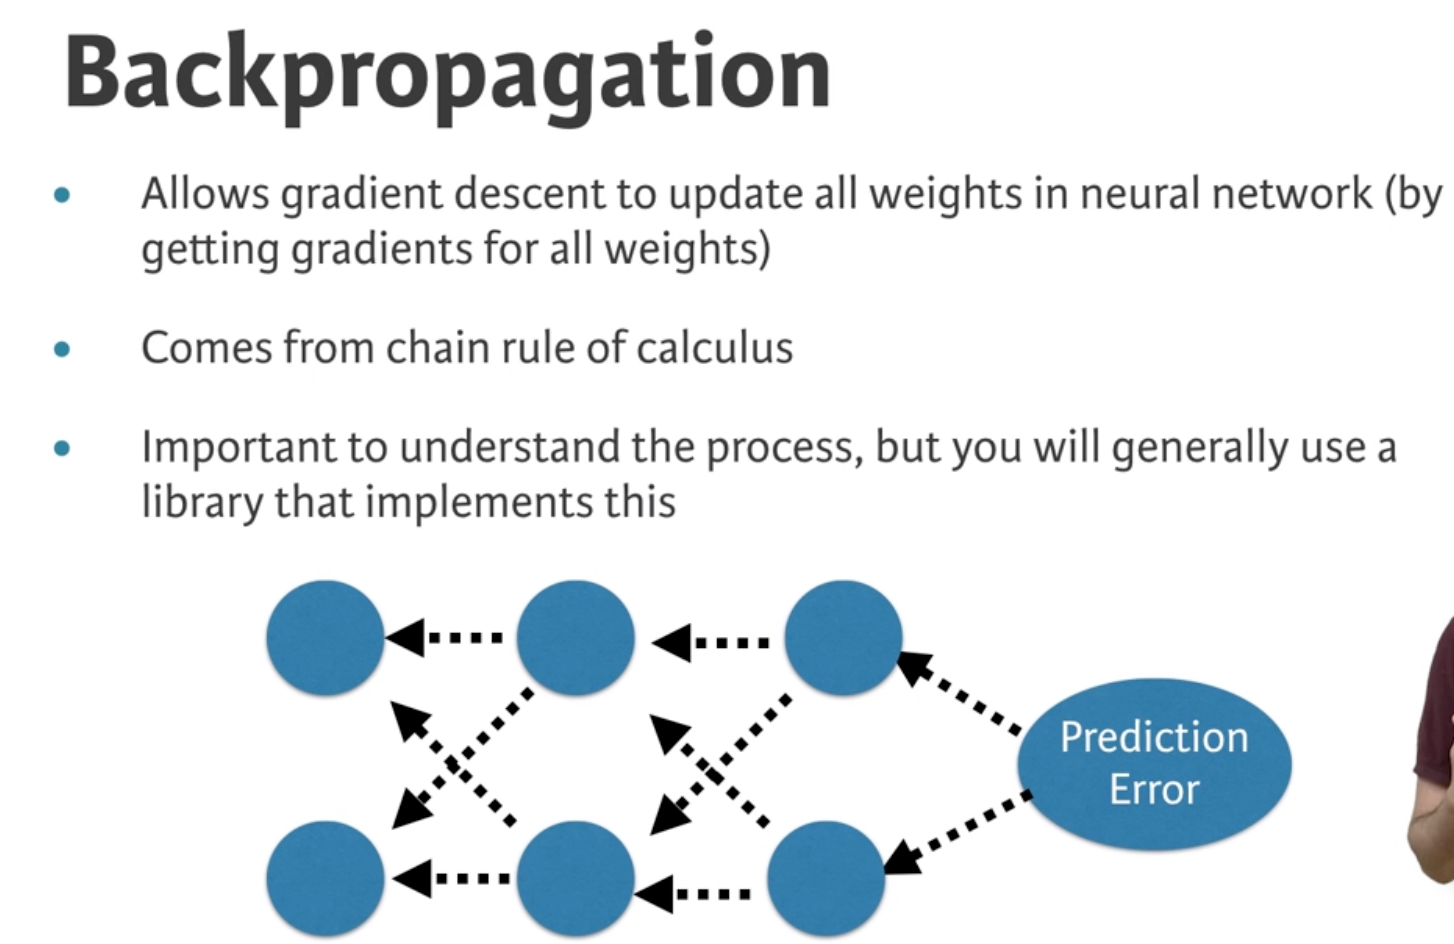

In [28]:
Image(filename='backp.png')

Back propagtion is tricky : we should focus on the general structure of the algorithm, rather than trying to memorize every mathematical detail. 

the general structure of the algorithm : Goals 

the goal is to estimate the slope of the loss function with respect to each weight in our netwrok using back propagarion. In back propagation we use prediction error (which is the result of the forward popagation) to calculate some of those slopes. This means that in order to do the back propagation we always start with a forward propagation to make the prediction and calculate an error which it the starting point to do the back propagation. 

##### Back propagtion process (this process is clear in the exercice bellow) :  

- step1 :go back one layer a time and each time we go back in a layer we will be using a formula for slopes.

- step1 : Every weight feeds from input node to some output node, the three things we multiply to get the slope(gradient weight) for that weight : 
- - node value feeding into that weight * the slop from plotting loss function w.r.t node it feeds into. * the slope of activation function at the node it feeds into. 

- keep track of the slopes of the loss function w.r.t node values.(slope of node values are the sum of the slopes for all weights that come out of them.)

- final step : getting the new weights = wights - learning_ rate * slope weights, and then place the new weights and calculate the prediction. 


The back propagation could be repeated until we reach the minimal error.



process explained : 

we know the value at the node feeding into this weight, either it's an input layer in which case we have it from the data, or that node is in a hidden layer, in which case we calculated its value when we did forward propagation. 

the second item in this list is slope of the loss function with respect to the output node, we do backward propagation from the right side of the diagram to the left side, so we already calculated that slope by the time we plug it into the current calculations.

finally we need the slope of the activation function at the node it feeds into .
for the ReLu function the slope is 0 if the input in a node is negative, if the input into the node is positive the output is the same as the input. so the slope would be 1.

keep track of the slopes of the loss function w.r.t node values becaue we use those slopes of our calculations of slopes at weights

the slope of of loss function w.r.t any node value is the sum of the slopes for every weigths coming into that node 

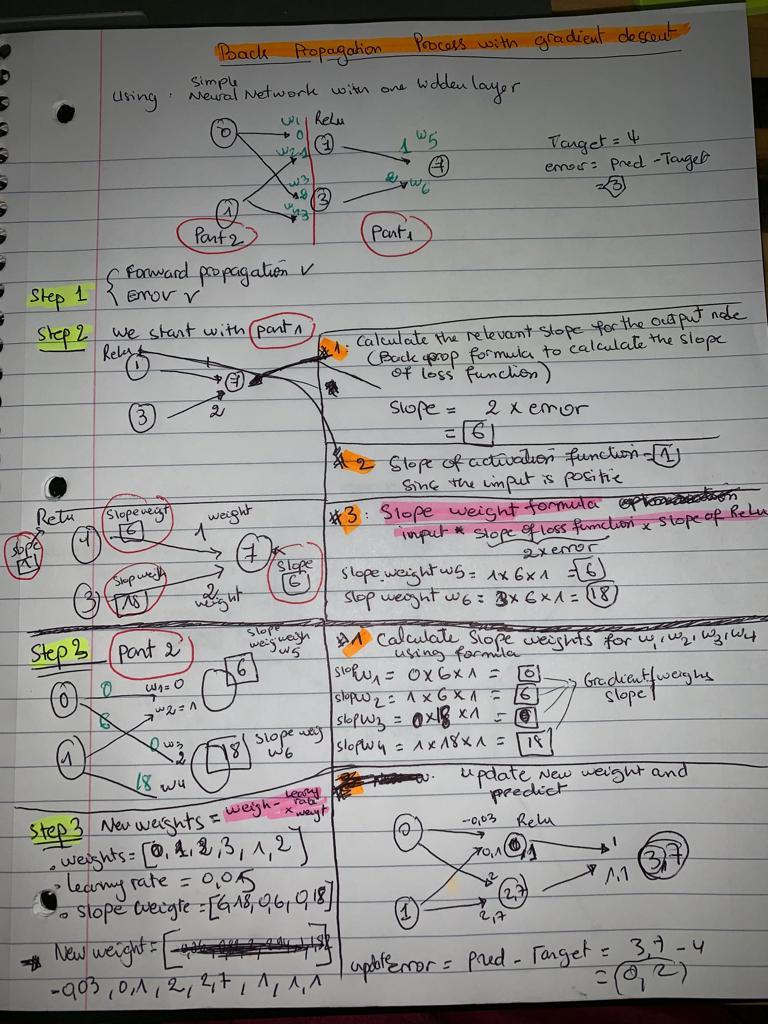

In [35]:
## 2.3 Backpropagation in practice (gradient descent and backward propagation)

Image(filename='backproex.jpeg')

#Back propagation in practice and applying the process : 



#### Stochastic gradient descent : 

for computational effeciency, it's commen to calculate slopes on only a subset of the data, called a batch(part 1 and part 2) for each update of the weights. then we use a diffrent batch o data to calculate the next update (part 2).

Once we have all our data, we start over again at the beginning of the data, each time through the full training data is called an epoch. So if we are going through our data for the third time, we would say we are on the third epoch.

When the slopes are calculated on one batch a time, rather than the full data, that is called Stochastic gradient descent, which uses all the data for each slope calculation

# 3. Building deep learning models with keras

the keras library to build deep learning models for both regression as well as classification! You'll learn about the Specify-Compile-Fit workflow that you can use to make predictions and by the end of this chapter, you'll have all the tools necessary to build deep neural networks!


## 3.1 Creating a keras model for a regression problem: 

create and optimize a neural network model using the Keras interface to the TenserFlow deep learning library. 
The keras workflow has 4 steps: 
- **Step1** :specify the architecture(how many layers, and how much layers in each node, which activation function to use in each layer). 

- **Step2** :compile the model : sets up the network for optimization  The compiler method has two important argument to choose from : a-the optimizer (that controls and tuns learning rate : 'Adam' is an optimizer algorithm, it adjusts the learning rate as it does gradient descent to ensure reasonable values throughout the weight optimization process. b- the loss function: mse for regression problems, 

- **Step3** :fit the model : the cycle of back propagation and optimization of model weights with the data. 
- **Step4**predict 

we will focus on sequential to build a model, there is other way to build exotic models with complex pattern 
sequential model requires that each layer has weights or connections only to the layer coming after it in the network diagram.  


but how to choose the number of layers?
and how long to tain? 

In [55]:
# Creating a keras model with 2 hidden layers : 

#**Step1** specify the architecture


# Import necessary modules
import keras
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential

# import data as np array removing labels
# we read the data here so we can find the number of nodes in the input layer stored as variable n_cols
predictors = np.loadtxt('wagesNN.csv', delimiter=',', skiprows=1, usecols=(2,3,4,5,6,7,8,9,10))
target = np.loadtxt('wagesNN.csv', delimiter=',', skiprows=1, usecols=(1))

# Save the number of 'columns features' in predictors: n_cols 
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
# Standard layer type Dense : all the nodes in the previous layer connect to all the nodes in the current layer
#n_cols, if can have zny number of rows/ any number of data points.
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer/ prediction
model.add(Dense(1))


In [ ]:
## Step 2**  : compile the model 

# P.S: even with the optimiser if we scale the data we will improve our model 
#commen scaling is substructing the mean and dividing by the std
model.compile(optimizer='adam', loss= 'mean_squared_error')

# step 3 : fitting the model and applying back propagation and gradient descent with the data to update weights
# model.fit(predictors, target)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1


## 3.2 : Classification models

for the classification models we change few thing to be compatible with the classification model, 

- on Step2 : compiling 
loss function to be the most commenly used = 'categorical_crossentropy' it is similar to log loss : the lowe score the better the model, but it is hard to interpret so we will add the argument metrics = ['accuracy'] to the compile step to easy understand the diagnostics(printing the accuracy at the end of each epoch, which make it easer to see and understand the model progress. 

- Change the activation function to softmax, it ensure the predictions sum to 1 so they can be intepreted like probabilities.

- Modify the last layer so it has a separate node for each potential outcome. 

- for the target/outcome : in keras we need to convert categoricals(ex binary classification 0 or 1) to a format with separate colum for each output: colum for the outcome 0 and column for the outcome 1(this called one-hot encoding )


optimizer to use 'sgd', which stands for Stochastic Gradient Descent. 

In [5]:
## NN Classification models :

import pandas as pd
titanic = pd.read_csv('titanicnn.csv', index_col=0)
print(titanic.shape)

# inpsert the data
#It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. 

titanic.head()

(891, 11)


,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [6]:
survived = titanic.survived
features= titanic.drop('survived', axis=1)

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(survived)

#n_cols
n_cols = features.shape[1]
# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss ='categorical_crossentropy',metrics=['accuracy'] )

# Fit the model
# model.fit(features, target)

#predicting on new data
#model.predict(new_data)


## 3.3  Using models : 

In order to use the model :
- save the model after training it.
- reload the model. 
- make predictions.


##### verifying the model structure : 
printing out the summury of the model architecture
my_model.summary()

In [16]:
#  example of saving/ realoading/ making prediction:


# model.save('model_file.h5')

from keras.models import  load_model
#mymodel = load_model(model_file.h5')

# predictions = my_model.predict(new_data)

# take one columns where prediction is 1
#probability_true = prediction[:,1]

# 4 Fine-tuning keras models :

how to optimize your deep learning models in keras. You'll learn how to validate your models, understand the concept of model capacity, and experiment with wider and deeper networks.

## 4.1 Understanding model optimization

how to choose model architecture and model optimization arguments?

in practice, optimization is a hard problem because :
- the optimal value of any one weights depends on the values of other weights and we are optimazing many weights at once.
- also updates may not improve our model meaningfully.
- small learning rate make give small update large learning rate may give large update 
A smart optimizer like adam my help but optimization problems may still occur. 
it better to use sgd optimiser because if uses fixed learning rate that is aroud 0 and 1, but still we can specify our learning algorithm if we wanted. 
sometimes, even if the leaning rate is tuned, we can into the problem called **dying-neuron-problem** : it occurs when a neuron takes a value less than 0 for all the rows of data (the problem occurs when the slope of ReLu is 0 because the weights dont get updated and this is contribute nothing to the model.

To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy']in model.compile()

## 4.2 Model validation

- a validation data is used to test model performance.
- k-fold validation is not used in deep learning because deep leaning is widely used on large datasets
- we use single validation, it's reliable because the score is computed on a very large data.
- keras make it easy to use some the data as a validation data 
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictores, target, validation_split= 0.3) 
we stop training the model when the validation score is not improving. we do this using **early stopping**
and use it before fitting the model
from keras.callbacks import EarlyStopping 
early_stopping_monitor = EarlyStopping(patience =2), patience means how many epoch can the model go without improving.

- smart traning logic when we rely on a fixed number of epochs without looking at the validation scores, delfaut epochs in keras is 10 
model.fit(predictores, target, validation_split= 0.3, epochs =20, callbacks =[early_stopping_monitor])
*N.B :Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far.
 
 
 
when fixing the model performance as above, we can freely go back to the model for experimentation  by changing :
- architecture.
- number of layers.
- number nodes. 

creating a great model requires some experimentation, because your discover what works best for the data.
- create diffrente models by changing the main model.
- run experimentation.
- compare the models perfomance by plotting the accuracy to see which model is the better. 


In [17]:
## Model validation with early stopping and accuracy performance
# Creating a model that stops when the accuracy does't improve in 2 epochs

## Import EarlyStopping
# from keras.callbacks import EarlyStopping

## Save the number of columns in predictors: n_cols
# n_cols = predictors.shape[1]
# input_shape = (n_cols,)

## Specify the model
# model = Sequential()
# model.add(Dense(100, activation='relu', input_shape = input_shape))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(2, activation='softmax'))

# # Compile the model
# model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

# # Define early_stopping_monitor
# early_stopping_monitor = EarlyStopping(patience=2)

# # Fit the model
# hist = model.fit(predictors,target, validation_split=0.3,epochs =30, callbacks=[early_stopping_monitor] )


In [ ]:
# Creating two models based on titanic data and comparing their score accuracy :


import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense


# Define early_stopping_monitor for both models
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

###########################
# create model_1

model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=(10,)))
model_1.add(Dense(10, activation='relu', input_shape=(10,)))
model_1.add(Dense(2, activation='softmax', input_shape=(10,)))

#compli model:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


###########################
# Create model_2
model_2 = Sequential()
model_2.add(Dense(100, activation='relu', input_shape=(10,)))
model_2.add(Dense(100, activation='relu', input_shape=(10,)))
model_2.add(Dense(2, activation='softmax', input_shape=(10,)))

#compile model:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#############################
##fitting the models 
# Fit model_1
model_1_training = model_1.fit(features, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(features, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)


#verbose=False in model.fit(): This prints out fewer updates, since you'll be evaluating the models graphically instead of through text.

#############################

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

print('the best model is the one that has a lower loss value')

## the kernel dies before showing the results 


Instructions for updating:
Use tf.cast instead.


## 4.3 Thinking about model capacity :

which architecture to use? 
'model capacity' or 'network capacity' is closely related to the term of overfitting and underfitting :
models capacity represents the model's ability to capture predictive patter in your data.
so the more capacity a model has, the more overfitting it becomes (too many layers and too many nodes), and vice versa, the less capacity the model is, the mover underfitting it becomes (not much layers and much nodes)

#### workflow to optimize model capacity:  by changing number of layers and nodes to get the best accuracy score

- start with a simple network.
- get the score validation.
- keep increasing model capacity(adding layer/nodes) until validation score is no longer improving.
- once the model stop  because the accuracy score is no more imporving we start decreasing the capasity slighty(reducing layers or nodes)  until we find the ideal models based on the result on the test accuracy(high score)/loss function(lower error).


# 5 neural network on image data using MNIST data

conventional neural network (image data)

Steps to building a deep learning model that predicts which digist is on the picture from 0 to 9
- get the images. each images is 28*28 pixel grid
- convert the image data to an array by ftatening them to one dimentional array 
- build the model. N.B : the number of nodes in this layer should be the same as the number of possible outputs in this case: 10.
- if the accuracy score is low(not arount 90%) we keep increasing model capacity(adding layer/nodes) until validation score is no longer improving. (using stop early and increasing the number of epochs).
- when the model stop because accuracy score is no more imporving we start decreasing capasity until we find the ideal models based on the result on the test accuracy(high score)/loss function(lower error)

In [1]:
# Example : 

# X = predictor data
# y = target

# # Create the model: model
# model = Sequential()

# # Add the first hidden layer
# model.add(Dense(50, activation='relu', input_shape=(784,)))

# # Add the second hidden layer
# model.add(Dense(50, activation='relu', input_shape=(784,)))

# # Add the output layer
# model.add(Dense(10, activation='softmax', input_shape=(784,)))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Fit the model 
# model.fit(X,y, validation_split= 0.3)

## the accuray result in the 10 default epoch is 0.80

# we can improve the capasity of the model by increasing layers/nodes and adding stop early to control ...

## next course for deep learning : advanced deep leaning in python
## image data : conventional nn 

wiki = list for datasets for machine learning reaserch
Keras.io